# Exploratory Data Analysis #

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
data = pd.read_csv("data/ryanair_reviews.csv")

# Display the first few rows of the dataframe and the data types of each column
data.head(), data.dtypes

(   Unnamed: 0 Date Published  Overall Rating Passenger Country  Trip_verified  \
 0           0     2024-02-03            10.0    United Kingdom   Not Verified   
 1           1     2024-01-26            10.0    United Kingdom  Trip Verified   
 2           2     2024-01-20            10.0    United Kingdom  Trip Verified   
 3           3     2024-01-07             6.0    United Kingdom  Trip Verified   
 4           4     2024-01-06            10.0            Israel  Trip Verified   
 
                               Comment title  \
 0         "bang on time and smooth flights"   
 1          "Another good affordable flight"   
 2                       “Really impressed!”   
 3          “a decent offering from Ryanair”   
 4  “cabin crew were welcoming and friendly”   
 
                                              Comment        Aircraft  \
 0  Flew back from Faro to London Luton Friday 2nd...  Boeing 737 900   
 1  Another good affordable flight with Ryanair. O...             NaN 

In [4]:
# Remove redundant columns
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Convert date columns to datetime objects
data_cleaned['Date Published'] = pd.to_datetime(data_cleaned['Date Published'])
data_cleaned['Date Flown'] = pd.to_datetime(data_cleaned['Date Flown'], errors='coerce')  # Using coerce to handle any invalid dates

# Convert the 'Recommended' column to boolean values
data['Recommended'] = data['Recommended'].map({'yes': True, 'no': False})

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Display the missing value statistics
missing_values[missing_values > 0]


C:\Users\Niklas Kothe\AppData\Local\Temp\ipykernel_7264\3815838571.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date Flown'] = pd.to_datetime(data_cleaned['Date Flown'], errors='coerce')  # Using coerce to handle any invalid dates


Overall Rating             130
Trip_verified              944
Aircraft                  1698
Type Of Traveller          614
Origin                     615
Destination                615
Date Flown                 618
Seat Comfort               112
Cabin Staff Service        121
Food & Beverages           937
Ground Service             671
Value For Money              1
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64

c:\Users\Niklas Kothe\anaconda3\envs\daia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Niklas Kothe\anaconda3\envs\daia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


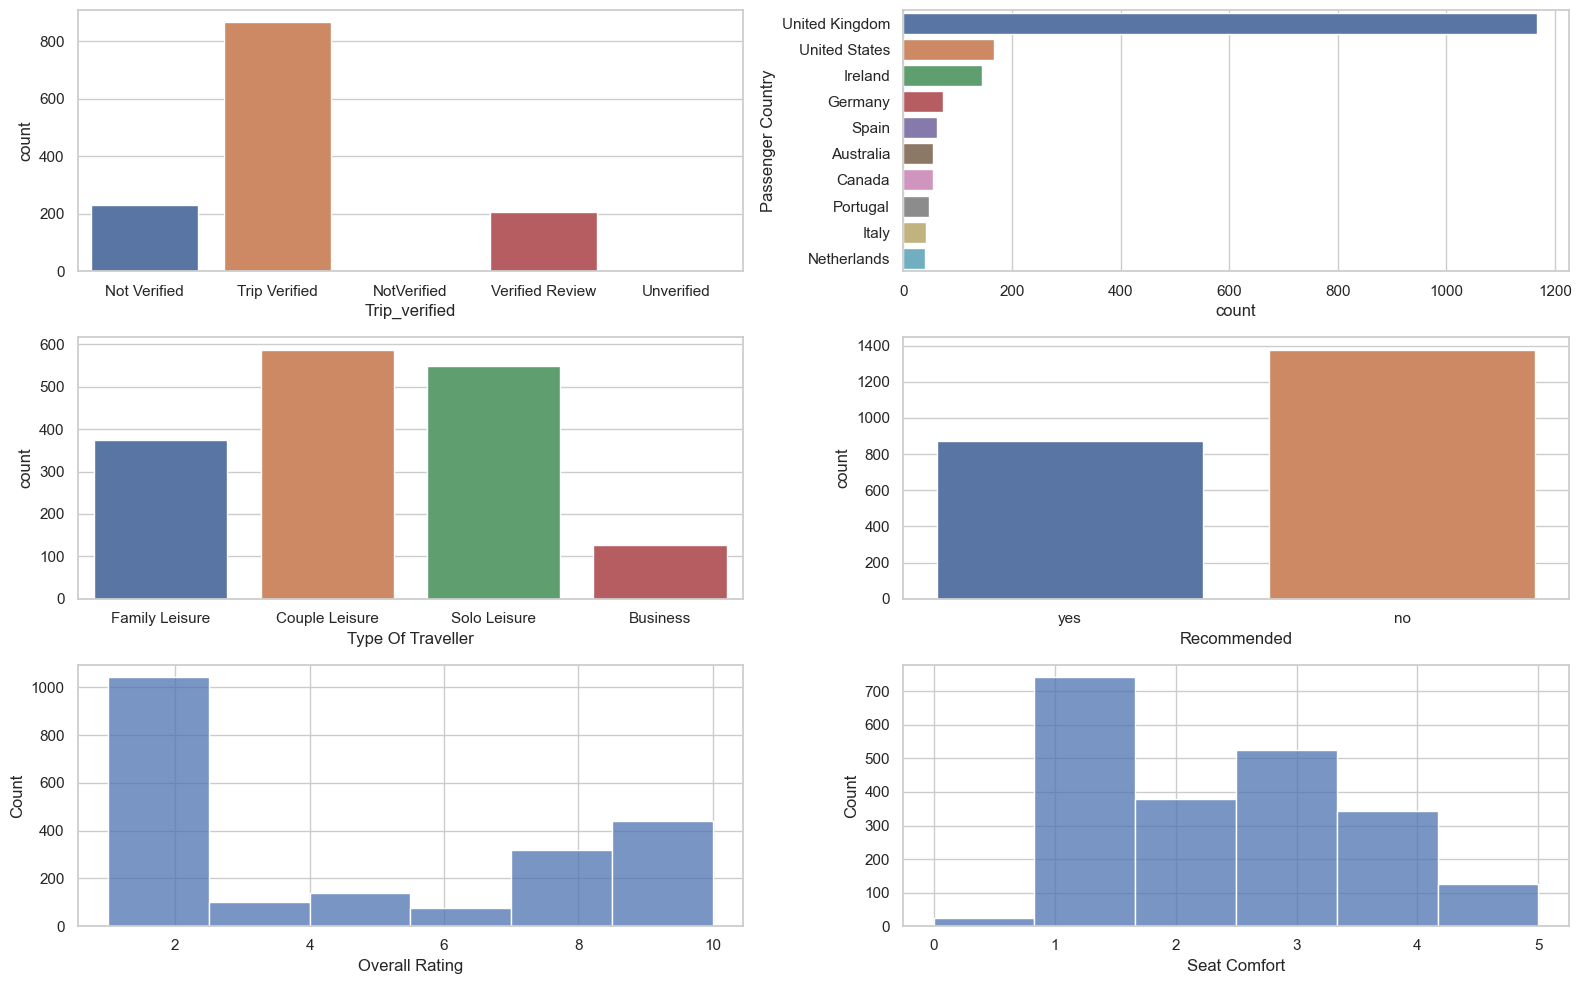

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Categorical Data Analysis: Count plots for various categorical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
sns.countplot(data=data, x='Trip_verified', ax=axes[0, 0])
sns.countplot(data=data, y='Passenger Country', order=data['Passenger Country'].value_counts().index[:10], ax=axes[0, 1])
sns.countplot(data=data, x='Type Of Traveller', ax=axes[1, 0])
sns.countplot(data=data, x='Recommended', ax=axes[1, 1])

# Numerical Data Analysis: Histograms for various numerical ratings
sns.histplot(data=data, x='Overall Rating', bins=6, kde=False, ax=axes[2, 0])
sns.histplot(data=data, x='Seat Comfort', bins=6, kde=False, ax=axes[2, 1])

plt.tight_layout()
plt.show()

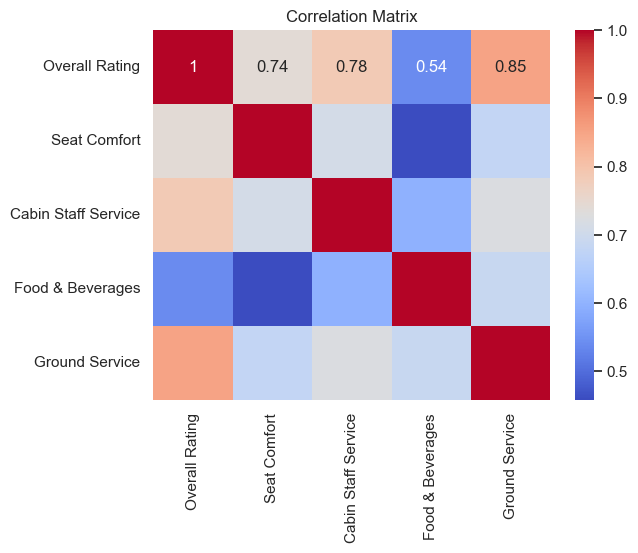

In [11]:
# Correlation matrix to see numerical relationships
correlation_matrix = data[['Overall Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()